

### Predicting Austin Weather 


In [2]:
import os
import pandas as pd


weather_data = pd.read_csv('austin_weather.csv') 
weather_data.head() 


,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


#### Check for nulls


In [18]:
weather_data.dropna(inplace=True)

weather_data.isnull().sum() 

Date                          0
TempHighF                     0
TempAvgF                      0
TempLowF                      0
DewPointHighF                 0
DewPointAvgF                  0
DewPointLowF                  0
HumidityHighPercent           0
HumidityAvgPercent            0
HumidityLowPercent            0
SeaLevelPressureHighInches    0
SeaLevelPressureAvgInches     0
SeaLevelPressureLowInches     0
VisibilityHighMiles           0
VisibilityAvgMiles            0
VisibilityLowMiles            0
WindHighMPH                   0
WindAvgMPH                    0
WindGustMPH                   0
PrecipitationSumInches        0
Events                        0
dtype: int64

### 1. Temperature Trends Visualization:

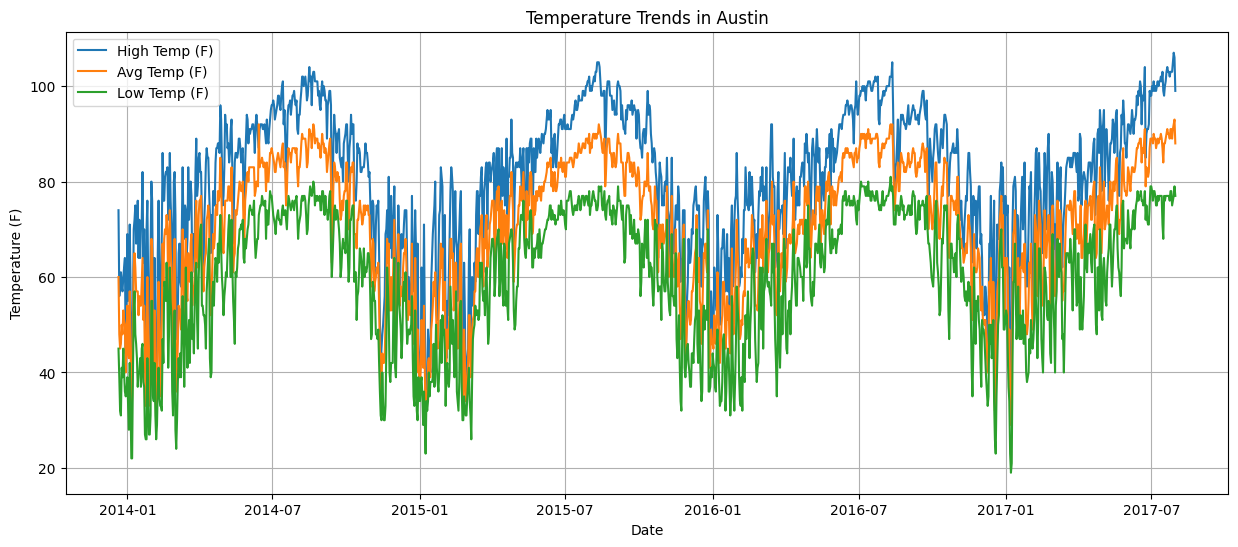

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

weather_data['Date'] = pd.to_datetime(weather_data['Date'])
plt.figure(figsize=(15, 6))
sns.lineplot(x='Date', y='TempHighF', data=weather_data, label='High Temp (F)')
sns.lineplot(x='Date', y='TempAvgF', data=weather_data, label='Avg Temp (F)')
sns.lineplot(x='Date', y='TempLowF', data=weather_data, label='Low Temp (F)')
plt.title('Temperature Trends in Austin')
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.legend()
plt.grid(True)
plt.show()


##### The line plot above shows the trends in high, average, and low temperatures over time. This visualization helps in understanding how temperature fluctuates throughout the period covered by the data.

#### Temperature summary :

* High (TempHighF): Ranges from 32°F to 107°F with an average of around 80.86°F.
* Average (TempAvgF): Varies from 29°F to 93°F with a mean of approximately 70.64°F.
* Low (TempLowF): Fluctuates between 19°F and 81°F, averaging about 59.90°F.

### 2. Summary Statistics:

In [20]:
#Converting column data types to numeric

relevant_columns = ['TempHighF', 'TempAvgF', 'TempLowF', 'HumidityHighPercent', 'HumidityAvgPercent', 'HumidityLowPercent', 'PrecipitationSumInches']
for col in relevant_columns:
    weather_data[col] = pd.to_numeric(weather_data[col], errors='coerce')
summary_statistics = weather_data[relevant_columns].describe()

summary_statistics.describe() 


,TempHighF,TempAvgF,TempLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,PrecipitationSumInches
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,225.078662,217.961102,209.761701,227.738884,215.016952,201.741704,150.098057
std,443.080871,445.684766,448.835313,441.255097,446.064566,451.347147,422.207945
min,14.766523,14.045904,14.190648,11.038637,12.463634,10.000000,0.000000
25%,62.000000,53.750000,41.500000,73.000000,51.000000,28.993658,0.000000
50%,81.931387,71.821456,61.451478,88.936219,66.835991,44.479499,0.068134
75%,95.750000,85.500000,75.000000,95.500000,79.750000,64.500000,1.636142
max,1319.000000,1319.000000,1319.000000,1317.000000,1317.000000,1317.000000,1195.000000


### 3. Correlation Analysis:


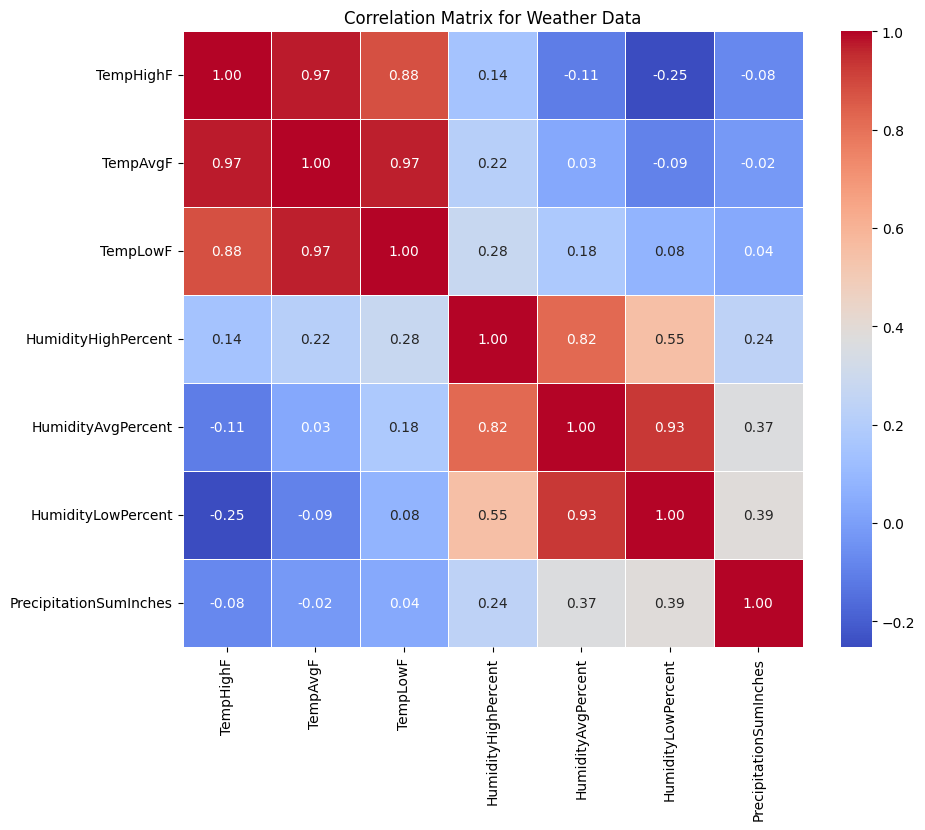

In [21]:
correlation_matrix = weather_data[relevant_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix for Weather Data')
plt.show()

* Correlation coefficients close to 1 or -1 indicate a strong positive or negative relationship, respectively.
* Correlations around 0 suggest little to no linear relationship between the variables.

#### Key observations:

* Temperature Correlations: High, average, and low temperatures are strongly positively correlated with each other, as expected.

* Temperature and Humidity: There's a negative correlation between temperature and humidity, indicating that higher temperatures often correspond to lower humidity levels.

* Precipitation: Precipitation shows a modest positive correlation with humidity but is less correlated with temperature.

### 4. Precipitation Distribution:

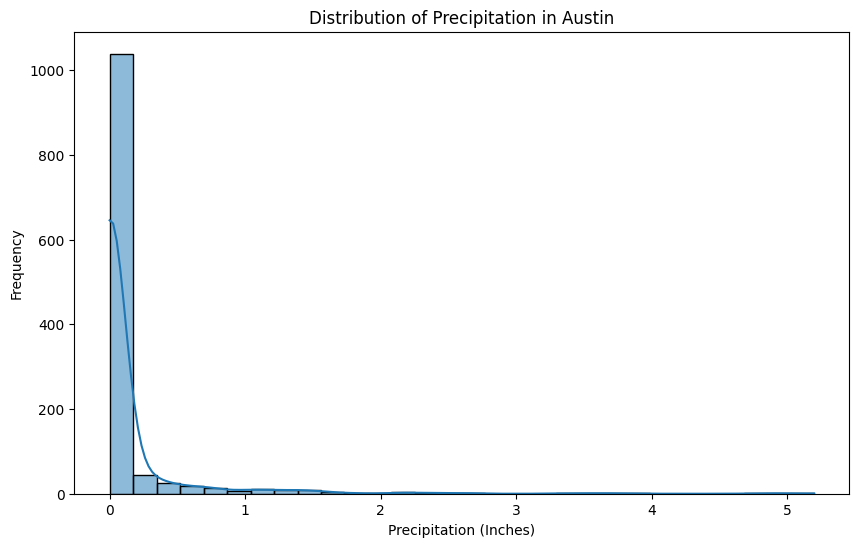

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(weather_data['PrecipitationSumInches'], bins=30, kde=True)
plt.title('Distribution of Precipitation in Austin')
plt.xlabel('Precipitation (Inches)')
plt.ylabel('Frequency')
plt.show()

* The histogram above shows the distribution of precipitation in Austin. The distribution is highly skewed towards lower precipitation values, with the majority of days having little to no rain. There are relatively few days with high precipitation levels. 

### 5. Precipitation Over Time:



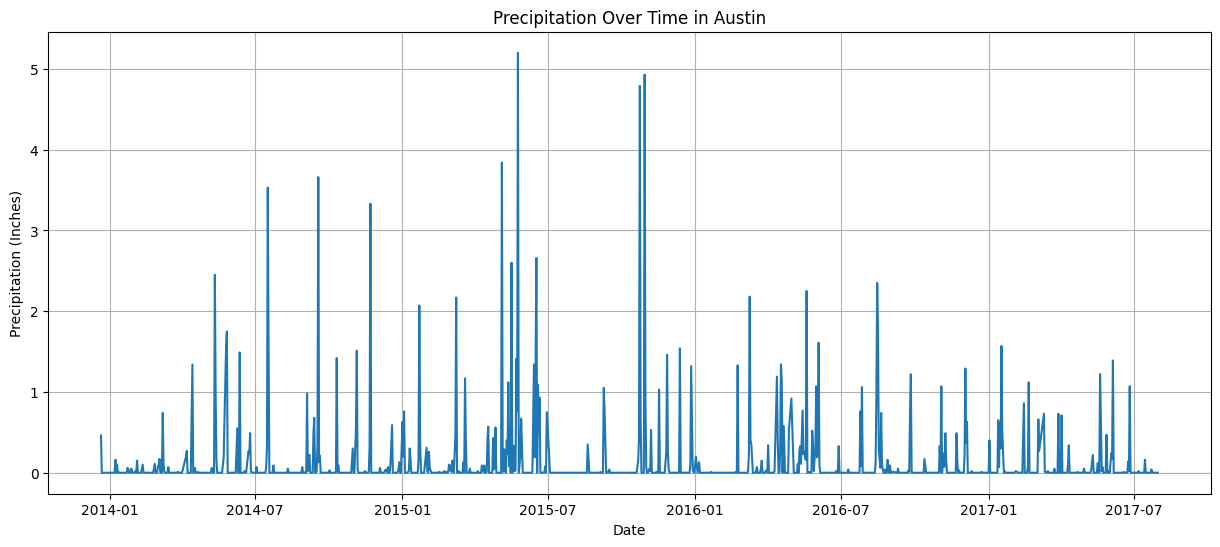

In [23]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='Date', y='PrecipitationSumInches', data=weather_data)
plt.title('Precipitation Over Time in Austin')
plt.xlabel('Date')
plt.ylabel('Precipitation (Inches)')
plt.grid(True)
plt.show()

### 6. Machine Learning - Data Preparation:

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 



weather_data['Year'] = weather_data['Date'].dt.year
weather_data['Month'] = weather_data['Date'].dt.month
weather_data['Day'] = weather_data['Date'].dt.day

features = ['Year', 'Month', 'Day', 'TempHighF', 'TempLowF', 'HumidityAvgPercent']
target = 'TempAvgF'

weather_data.fillna(weather_data.select_dtypes(include=['number']).mean(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(weather_data[features], weather_data[target], test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train) 

print("Train Data Score for linear regression : {} ". format(model.score(X_train, y_train)))
print("Test data Score  fpr linear regression : {} ". format(model.score(X_test, y_test)))

Train Data Score for linear regression : 0.9996649513102502 
Test data Score  fpr linear regression : 0.9971012198578261 


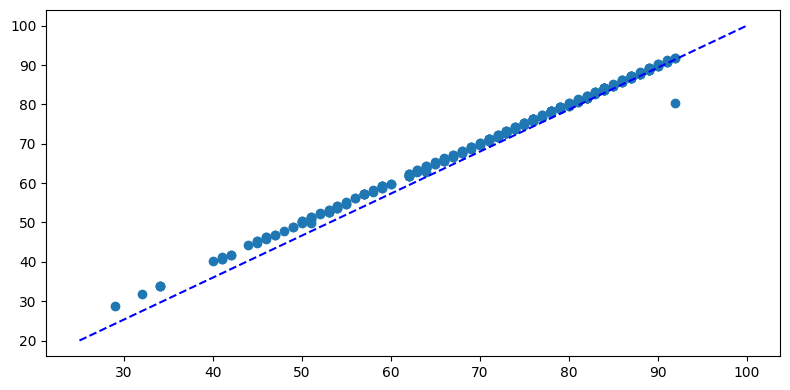

In [25]:
predicted  = model.predict(X_test)
expected = y_test
plt.figure(figsize = (8,4))

plt.scatter(expected,predicted)

plt.plot([25,100], [20,100], '--b')

plt.tight_layout()

#### Applying Cross Validation 
##### Linear Regression

In [26]:
from sklearn.model_selection import cross_val_score

# Defining the Linear Regression model
lr = LinearRegression()

X = weather_data[features]
y = weather_data[target]

# Applying 5-Fold Cross-Validation for Linear Regression
cv_scores_lr = cross_val_score(lr, X, y, cv=5, scoring='neg_mean_squared_error')

# Converting scores to positive values
cv_scores_lr_positive = -cv_scores_lr

# Calculating the average and standard deviation of the scores
cv_mean_lr = cv_scores_lr_positive.mean()
cv_std_lr = cv_scores_lr_positive.std()

print("Average of Scores            : {} ".format(cv_mean_lr))
print("Standard Deivation of Scores : {} ".format(cv_std_lr))


Average of Scores            : 0.1726392244935774 
Standard Deivation of Scores : 0.2083797736304231 


#### Subset of data (500)

In [27]:
from sklearn.utils import resample
from sklearn.ensemble import RandomForestRegressor


# Define the Random Forest model with the best parameters
rf_cv = RandomForestRegressor(max_depth=10, min_samples_split=2, n_estimators=200, random_state=42)

# Resampling the data (taking a random subset)
X_sampled, y_sampled = resample(X, y, n_samples=500, random_state=42)

# Applying 5-Fold Cross-Validation for Random Forest on a subset
cv_scores_rf_subset = cross_val_score(rf_cv, X_sampled, y_sampled, cv=5, scoring='neg_mean_squared_error')

# Converting scores to positive values
cv_scores_rf_subset_positive = -cv_scores_rf_subset

# Calculating the average and standard deviation of the scores
cv_mean_rf_subset = cv_scores_rf_subset_positive.mean()
cv_std_rf_subset = cv_scores_rf_subset_positive.std()

print("Average Score: {}" .format(cv_mean_rf_subset))
print("Standard Deviation Score: {}" .format(cv_std_rf_subset))



Average Score: 0.604492531430385
Standard Deviation Score: 0.2398283352249235


### 7. Machine Learning - Model Training and Hyperparameter Tuning 
#### Random Forest Regressor

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


rf = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

predictions = best_rf.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Calculating RMSE
rmse = mse**0.5

# Calculating MAE
mae = mean_absolute_error(y_test, predictions)


RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

In [38]:
best_rf


RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

In [39]:
best_params

{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}

### 8. display values 

In [33]:
print("mse  :", mse)
print("r2   :", r2) 
print("rmse :", rmse)
print("mae  :", mae) 

print("Best Hyperparameters for Random Forest Regressor:")
for param, value in best_params.items():
    print(f"  - {param}: {value}")


mse  : 0.7333300017978496
r2   : 0.9964438963131443
rmse : 0.8563468933778235
mae  : 0.3713808039957968
Best Hyperparameters for Random Forest Regressor:
  - max_depth: 10
  - min_samples_split: 2
  - n_estimators: 200


#### Our calculated mean sqaure value and r2 value tells us that our predicted values are clsoed to the true values. 


### 9. MSE & R2 plot. 

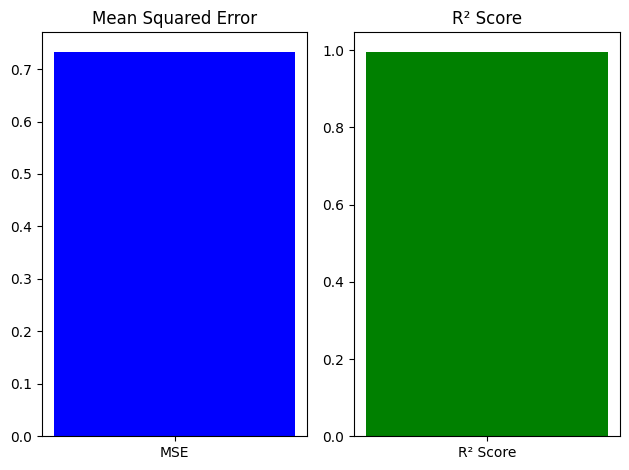

In [ ]:
# MSE Plot
plt.subplot(1, 2, 1)
plt.bar('MSE', mse, color='blue')
plt.title('Mean Squared Error')


# R2 Score Plot
plt.subplot(1, 2, 2)
plt.bar('R² Score', r2, color='green')
plt.title('R² Score')

plt.tight_layout()
plt.show()

### For practice, lets predict the weather of 11/14/2023


In [36]:
input_data = pd.DataFrame({
    'Year': [2023],
    'Month': [11],
    'Day': [14],
    'TempHighF': [70],
    'TempLowF': [54],
    'HumidityAvgPercent': [82]
})

# Convert HumidityAvgPercent to the same scale as in the training data (if it was in percentage)
input_data['HumidityAvgPercent'] = input_data['HumidityAvgPercent'] / 100  # Only if your model was trained with humidity in a 0-1 scale

# Predicting using the model
predicted_avg_temp = best_rf.predict(input_data)

# The predicted average temperature
predicted_avg_temp[0]

62.168221625596644